In [1]:
import sys
sys.path.append("..")
import xarray as xr
import numpy as np
from LESutils import load_stats, load_full
from matplotlib import pyplot as plt

# Determine windows for fitting
## Load RFM.nc, var4.nc, stats file

In [16]:
dnc = "/home/bgreene/simulations/u15_tw10_qw04_dry3/output/netcdf/"
s = load_stats(dnc+"mean_stats_xyt_5-6h_rot.nc", SBL=False)
RFM_var = xr.load_dataset(dnc+"RFM.nc")
var4 = xr.load_dataset(dnc+"variances_4_order.nc")

Reading file: /home/bgreene/simulations/u15_tw10_qw04_dry3/output/netcdf/mean_stats_xyt_5-6h_rot.nc


## Plot u, w, theta, q

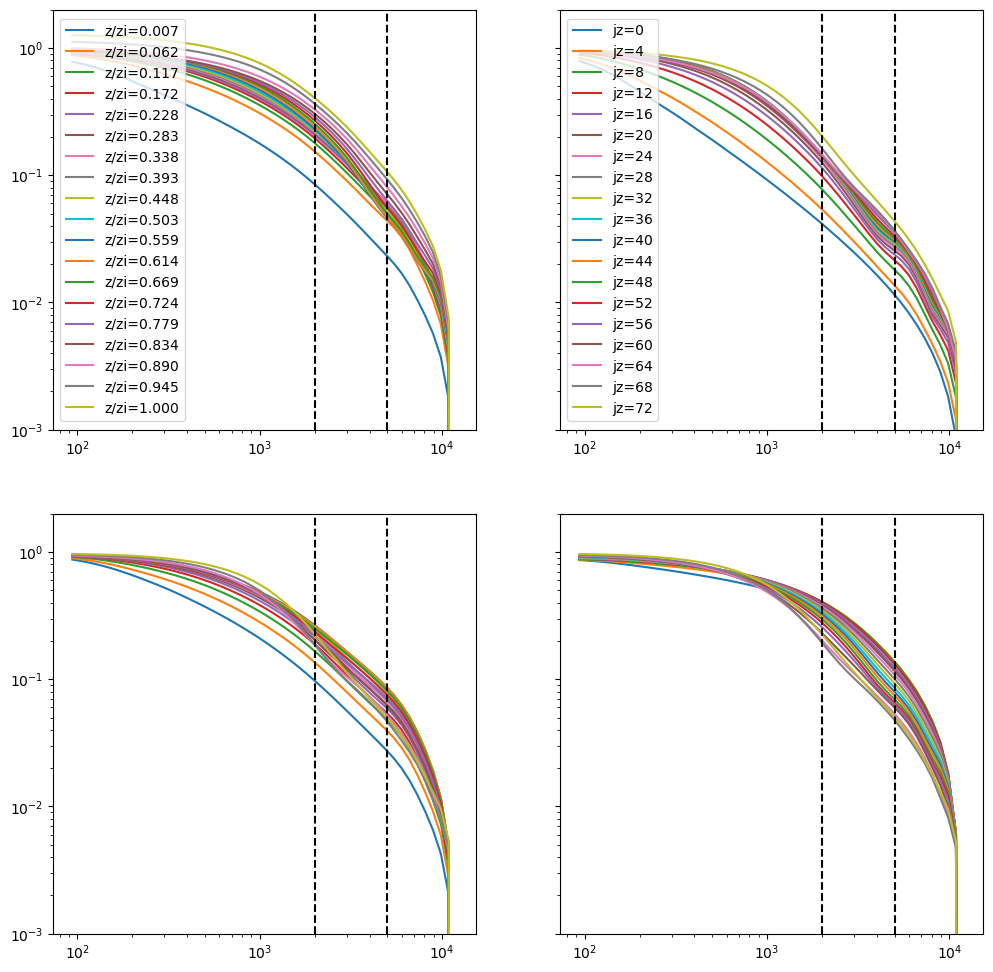

In [47]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(12, 12))
for jz in np.arange(0, s.nzabl, 4):
    # u
    ax1[0,0].loglog(RFM_var.delta_x, 
                    RFM_var.u.isel(z=jz)/s.u_var_rot.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # w
    ax1[0,1].loglog(RFM_var.delta_x, 
                    RFM_var.w.isel(z=jz)/s.w_var.isel(z=jz),
                    label=f"jz={jz}")
    # theta
    ax1[1,0].loglog(RFM_var.delta_x, 
                    RFM_var.theta.isel(z=jz)/s.theta_var.isel(z=jz))
    # q
    ax1[1,1].loglog(RFM_var.delta_x, 
                    RFM_var.q.isel(z=jz)/s.q_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])
ax1[0,0].legend(loc="center left")
ax1[0,1].legend(loc="center left")
dx_fit_1 = [2000, 5000]
for iax in ax1.flatten():
    iax.axvline(dx_fit_1[0], c="k", ls="--")
    iax.axvline(dx_fit_1[1], c="k", ls="--")

## Plot uw, tw, qw, uu, ww, tt

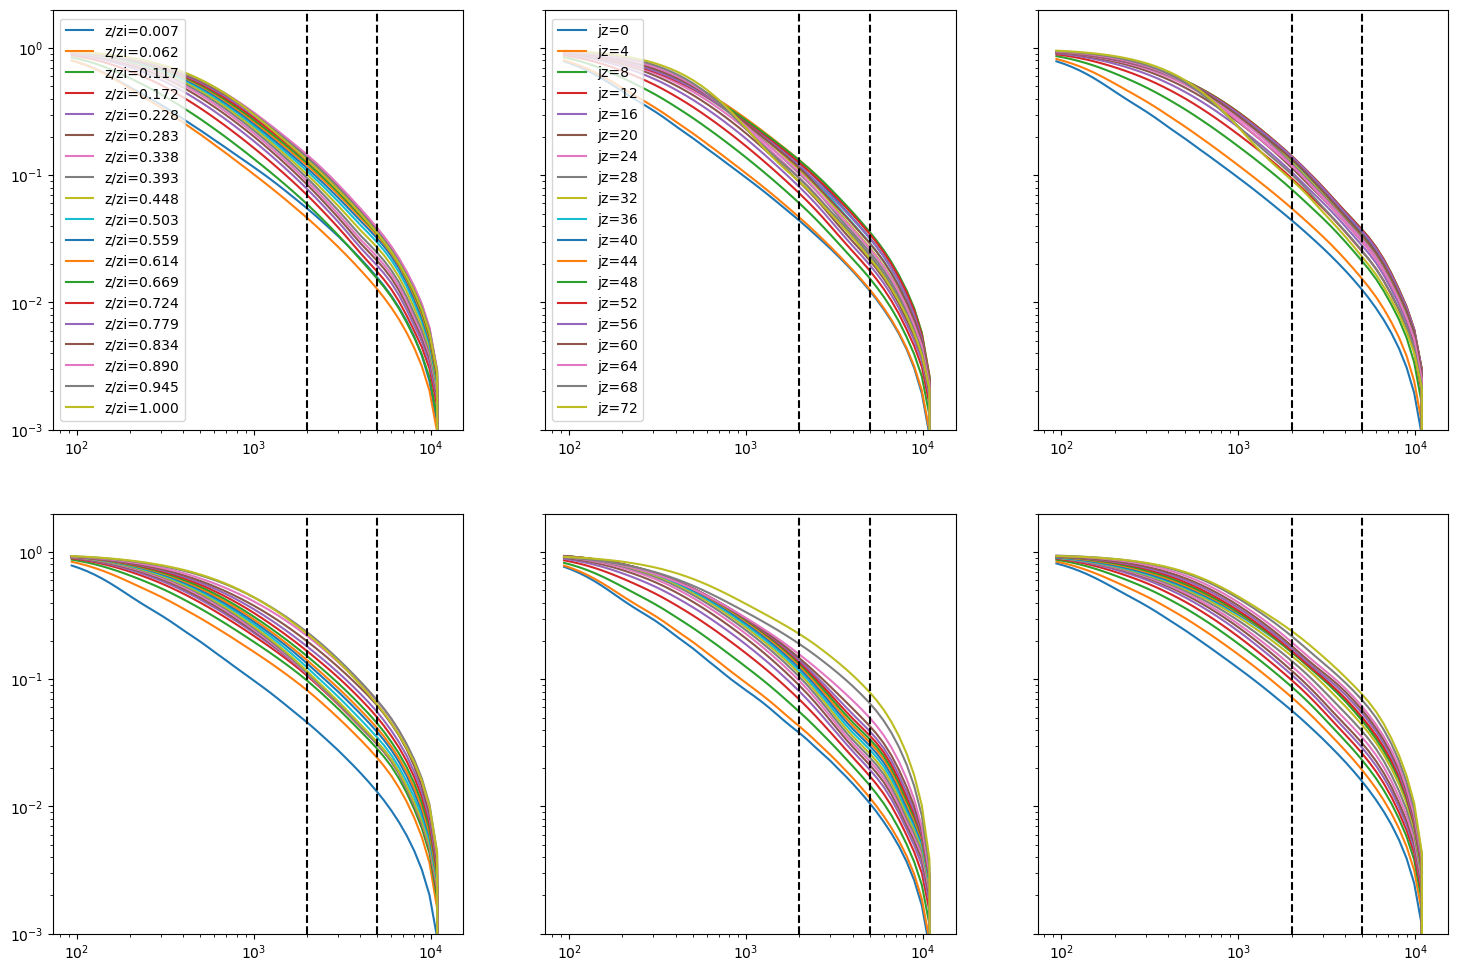

In [28]:
fig1, ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(18, 12))
for jz in np.arange(0, s.nzabl, 4):
    # uw
    ax1[0,0].loglog(RFM_var.delta_x, 
                    RFM_var.uw.isel(z=jz)/var4.uwuw_var.isel(z=jz),
                    label=f"z/zi={(s.z[jz]/s.h).values:4.3f}")
    # tw
    ax1[0,1].loglog(RFM_var.delta_x, 
                    RFM_var.tw.isel(z=jz)/var4.twtw_var.isel(z=jz),
                    label=f"jz={jz}")
    # qw
    ax1[0,2].loglog(RFM_var.delta_x, 
                    RFM_var.qw.isel(z=jz)/var4.qwqw_var.isel(z=jz))
    # uu
    ax1[1,0].loglog(RFM_var.delta_x, 
                    RFM_var.uu.isel(z=jz)/var4.uuuu_var.isel(z=jz))
    # ww
    ax1[1,1].loglog(RFM_var.delta_x, 
                    RFM_var.ww.isel(z=jz)/var4.wwww_var.isel(z=jz))
    # tt
    ax1[1,2].loglog(RFM_var.delta_x, 
                    RFM_var.tt.isel(z=jz)/var4.tttt_var.isel(z=jz))
    
ax1[0,0].set_ylim([1e-3, 2e0])
ax1[0,0].legend(loc="center left")
ax1[0,1].legend(loc="center left")
dx_fit_2 = [2000, 5000]
for iax in ax1.flatten():
    iax.axvline(dx_fit_2[0], c="k", ls="--")
    iax.axvline(dx_fit_2[1], c="k", ls="--")

# Plot quicklooks of resulting error profiles

In [25]:
ferr = dnc+"err.nc"
ferrLP = dnc+"err_LP.nc"

err = xr.load_dataset(ferr)
errLP = xr.load_dataset(ferrLP)

(0.0, 125.0)

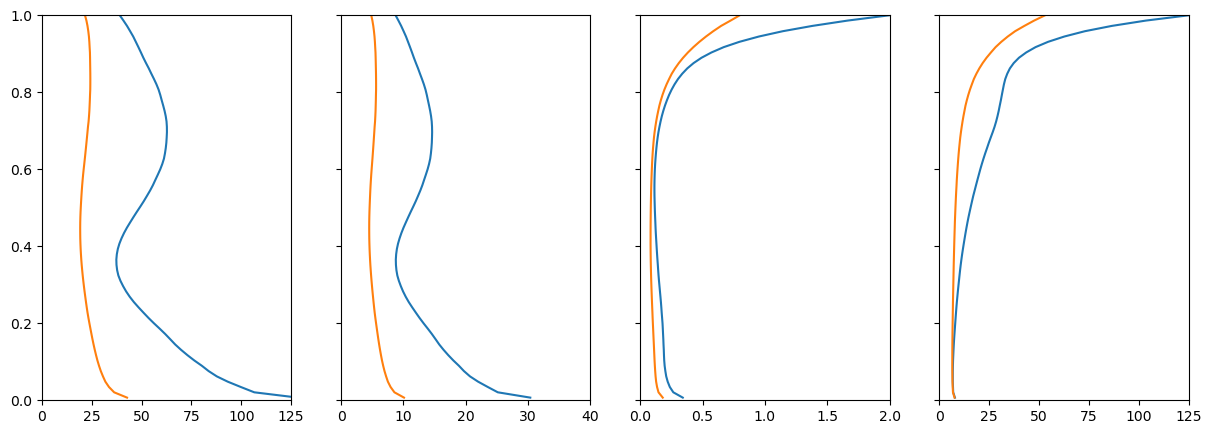

In [26]:
fig2, ax2 = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(14.8, 5))
# wspd
ax2[0].plot(100*err.wspd, err.z/s.h)
ax2[0].plot(100*errLP.wspd, errLP.z/s.h)
# wdir
ax2[1].plot(100*err.wdir, err.z/s.h)
ax2[1].plot(100*errLP.wdir, errLP.z/s.h)
# theta
ax2[2].plot(100*err.theta, err.z/s.h)
ax2[2].plot(100*errLP.theta, errLP.z/s.h)
# q
ax2[3].plot(100*err.q, err.z/s.h)
ax2[3].plot(100*errLP.q, errLP.z/s.h)

ax2[0].set_ylim([0, 1])
ax2[0].set_xlim([0, 125])
ax2[1].set_xlim([0, 40])
ax2[2].set_xlim([0, 2])
ax2[3].set_xlim([0, 125])

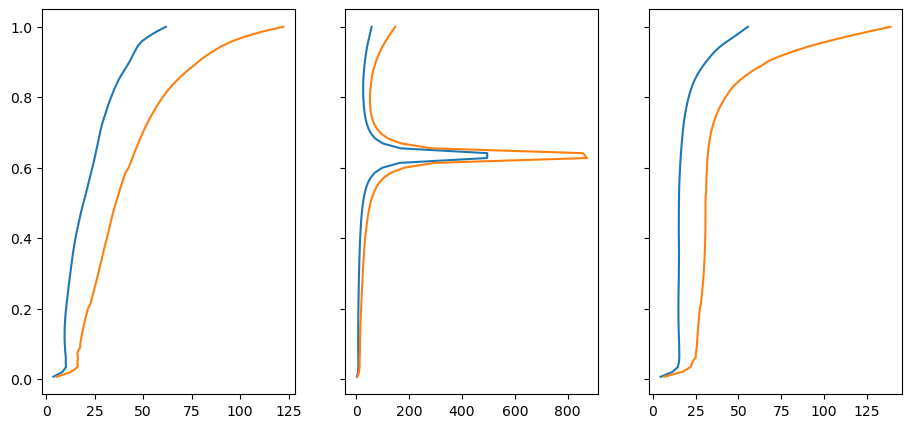

In [28]:
fig2, ax2 = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(11.1, 5))
# wspd
ax2[0].plot(100*err.ustar2, err.z/s.h)
ax2[0].plot(100*errLP.ustar2, errLP.z/s.h)
# wdir
ax2[1].plot(100*err.tw, err.z/s.h)
ax2[1].plot(100*errLP.tw, errLP.z/s.h)
# theta
ax2[2].plot(100*err.qw, err.z/s.h)
ax2[2].plot(100*errLP.qw, errLP.z/s.h)

In [30]:
err

<xarray.Dataset>
Dimensions:  (z: 73)
Coordinates:
  * z        (z) float64 7.874 23.62 39.37 ... 1.11e+03 1.126e+03 1.142e+03
Data variables: (12/20)
    u        (z) float64 0.8971 0.7285 0.6558 0.6016 ... 0.4238 0.4045 0.3849
    u_rot    (z) float64 0.7663 0.6409 0.5813 0.541 ... 0.3535 0.3218 0.2941
    v        (z) float64 4.978 4.245 4.076 3.856 ... 2.096 2.197 2.312 2.455
    v_rot    (z) float64 4.213e+16 inf inf 1.992e+16 ... 1.84e+16 inf inf inf
    theta    (z) float64 0.003408 0.002649 0.00237 ... 0.0138 0.01663 0.01998
    q        (z) float64 0.0774 0.06864 0.06766 0.06656 ... 0.8641 1.034 1.25
    ...       ...
    tt       (z) float64 0.09681 0.08232 0.07941 ... 0.1904 0.1852 0.1812
    qw       (z) float64 0.04602 0.1151 0.1466 0.1529 ... 0.4761 0.5162 0.5555
    qq       (z) float64 0.269 0.2515 0.2506 0.2507 ... 0.1738 0.1724 0.1718
    wspd     (z) float64 1.284 1.065 0.9975 0.9321 ... 0.4269 0.4092 0.3906
    wdir     (z) float64 0.3035 0.2515 0.2354 0.2199 ... 0.09641 0.09203 0.08746
    ustar2   (z) float64 0.03694 0.08382 0.1023 0.1008 ... 0.5281 0.569 0.6174
Attributes:
    nx:       128
    ny:       128
    nz:       128
    Lx:       12000
    Ly:       12000
    Lz:       2000
    dx:       93.75
    dy:       93.75
    dz:       15.748031496062993
    label:    u15_tw10_qw04_dry3
    rotate:   True

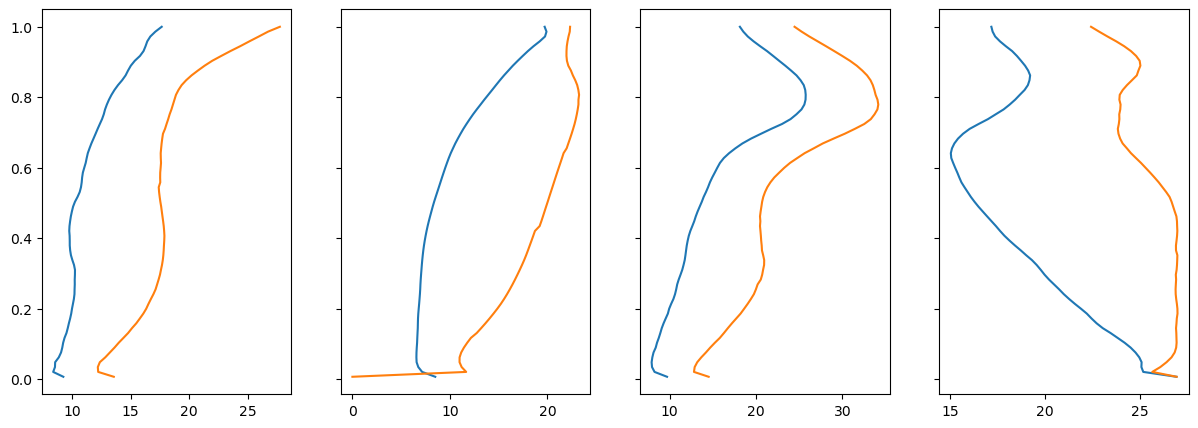

In [35]:
fig2, ax2 = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(14.8, 5))
# u var
ax2[0].plot(100*err.uur, err.z/s.h)
ax2[0].plot(100*errLP.uur, errLP.z/s.h)
# w var
ax2[1].plot(100*err.ww, err.z/s.h)
ax2[1].plot(100*errLP.ww, errLP.z/s.h)
# theta var
ax2[2].plot(100*err.tt, err.z/s.h)
ax2[2].plot(100*errLP.tt, errLP.z/s.h)
# q var
ax2[3].plot(100*err.qq, err.z/s.h)
ax2[3].plot(100*errLP.qq, errLP.z/s.h)